In [1]:
from ase.io import read
from ase.visualize.plot import plot_atoms
from abtem import Potential
import numpy as np
from matplotlib import pyplot as plt
import sys
sys.path.append('../')
from DM1dCalc.multislice import multislice, multislice_1d

In [2]:
sto_3bc = read('../structures/STO3bc.cif')
sto_3bc = sto_3bc.repeat((1, 3, 1))
energy = 200e3  # in eV
sampling = 0.065  # in Angstrom

potential = Potential(
    sto_3bc,
    sampling=sampling,
    slice_thickness=1,
    projection="finite"
).build().array
potential = np.array(potential)
height, width, depth = potential.shape

In [6]:
from DM1dCalc.ionization import dipole_transition_potential
#m, n = potential.shape[1:]
m, n = 32, 32
transitions = dipole_transition_potential(
    energy=energy,
    loss=456,
    sampling=sampling,
    shape=(m, n),
    posn=[[m//2, n//2],])
transitions

[array([[ 1.98354125e-06-2.63793045e-18j, -1.98354125e-06-1.93101910e-04j,
          1.98354125e-06-3.81306499e-04j, ...,
         -1.98354125e-06+5.56562050e-04j,  1.98354125e-06+3.81306499e-04j,
         -1.98354125e-06+1.93101910e-04j],
        [-2.00278214e-06-5.37288024e-18j,  2.00278214e-06-1.96381105e-04j,
         -2.00278214e-06-3.86285841e-04j, ...,
          2.00278214e-06+5.66417997e-04j, -2.00278214e-06+3.86285841e-04j,
          2.00278214e-06+1.96381105e-04j],
        [ 2.06201988e-06-5.12501588e-18j, -2.06201988e-06-2.04641174e-04j,
          2.06201988e-06-4.04421939e-04j, ...,
         -2.06201988e-06+5.91164845e-04j,  2.06201988e-06+4.04421939e-04j,
         -2.06201988e-06+2.04641174e-04j],
        ...,
        [-2.16605895e-06-1.82856536e-18j,  2.16605895e-06-2.19484438e-04j,
         -2.16605895e-06-4.32477280e-04j, ...,
          2.16605895e-06+6.35851551e-04j, -2.16605895e-06+4.32477280e-04j,
          2.16605895e-06+2.19484438e-04j],
        [ 2.06201988e-06-5.

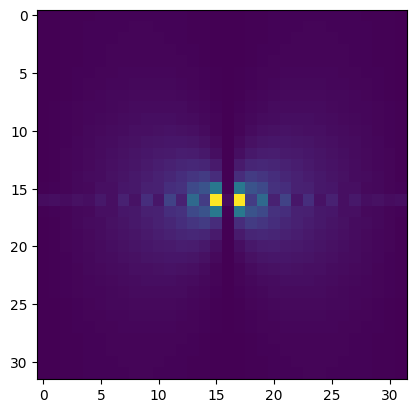

In [10]:
Hx, Hy, Hz = transitions
plt.imshow(np.abs(Hx))
plt.show()